# Project Members

Ayush Sinha LNU, Siddhardh Chochipatla, Amit Sunil Chaudhary

# README for Project Part 1-3
In this file we are discussing the cleaning and classification of data "Loan.csv".

First, we will clean the code of unnecessary Null values using the following code below:-

# README_Part4

Plots required are coded and executed below the main Random Forest code.

Comparing different features of the data with loan amount using graphs.

<ipython-input-1-2fa8a7b92638>:8: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/loan.csv")


       addr_state zip_code
count      887379   887379
unique         51      935
top            CA    945xx
freq       129517     9770
missing % addr_state: 0.0
missing % zip_code: 0.0
         annual_inc
count  8.873750e+05
mean   7.502759e+04
std    6.469830e+04
min    0.000000e+00
25%    4.500000e+04
50%    6.500000e+04
75%    9.000000e+04
max    9.500000e+06
       verification_status emp_length emp_title
count               887379     842554    835917
unique                   3         11    299271
top        Source Verified  10+ years   Teacher
freq                329558     291569     13469
missing % annual_inc: 0.00045076568185634325
missing % verification_status: 0.0
missing % emp_length: 5.051392922302647
missing % emp_title: 5.799325879922783
                   purpose initial_list_status   issue_d
count               887379              887379    887379
unique                  14                   2       103
top     debt_consolidation                   f  Oct-2015
freq    

<Axes: xlabel='count', ylabel='loan_status'>

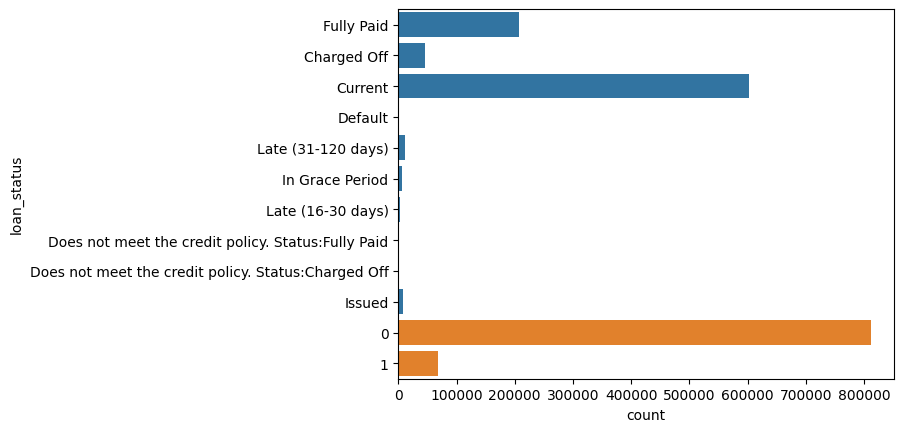

In [ ]:
# Cleaning the data from unnecessary values.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

data = pd.read_csv("/content/loan.csv")
data.head()

del_columns = []
for col in data.columns:
    if (data[col].isnull().sum() / len(data) * 100) > 90:
        del_columns.append(col)

data = data.drop(columns=del_columns)

id_columns = ["id", "member_id"]
data = data.drop(columns=id_columns)

feat_arr = ["addr_state", "zip_code"]
print(data[feat_arr].describe())
for col in feat_arr:
    print(f"missing % {col}:", data[col].isnull().sum() / len(data) * 100)

data["2_digit_zip"] = data["zip_code"].apply(lambda x: int(x[:2]))
data = data.drop(columns=["addr_state", "zip_code"])

feat_arr_num = ["annual_inc"]
feat_arr_cat = ["verification_status", "emp_length", "emp_title"]
print(data[feat_arr_num].describe())
print(data[feat_arr_cat].describe())
for col in feat_arr_num+feat_arr_cat:
    print(f"missing % {col}:", data[col].isnull().sum() / len(data) * 100)

def clean_emp_length(x):
    if pd.isna(x): return None
    if x.strip().lower()=="< 1 year": return 0
    elif x.strip().lower()=="1 year": return 1
    elif x.strip().lower()=="10+ years": return 11
    else: return int(x.rstrip("years").strip())

data["emp_length"] = data["emp_length"].apply(clean_emp_length)
data["emp_length"] = data["emp_length"].fillna(value=data["emp_length"].mean())

data["annual_inc"] = data["annual_inc"].fillna(value=data["annual_inc"].mean())

le = LabelEncoder()
data['verification_status'] = le.fit_transform(data['verification_status'])
data = data.drop(columns=["emp_title"])

feat_arr_cat = ["purpose", "initial_list_status", "issue_d"]
print(data[feat_arr_cat].describe())
for col in feat_arr_cat:
    print(f"missing % {col}:", data[col].isnull().sum() / len(data) * 100)

le = LabelEncoder()
data['purpose'] = le.fit_transform(data['purpose'])
data['initial_list_status'] = le.fit_transform(data['initial_list_status'])

def compute_time_since(x):
    if pd.isna(x): return None
    given_date = datetime.strptime(x, "%b-%Y")
    current_date = datetime.now()
    return (current_date - given_date).days / 365.25

data["issue_d"] = data["issue_d"].apply(compute_time_since)

data = data.drop(columns=["desc", "title", "url", "policy_code", "application_type"])

feat_arr_num = ["loan_amnt", "int_rate", "installment", "funded_amnt", "funded_amnt_inv",
"total_pymnt", "total_pymnt_inv", "last_pymnt_amnt", "total_rec_late_fee"]
data[feat_arr_num].describe()

feat_arr_cat = ["term", "last_pymnt_d"]
data[feat_arr_cat].describe()

for col in feat_arr_cat+feat_arr_num:
    print(f"missing % {col}:", data[col].isnull().sum() / len(data) * 100)

le = LabelEncoder()
data['term'] = le.fit_transform(data['term'])

data["last_pymnt_d"] = data["last_pymnt_d"].apply(compute_time_since)
data["last_pymnt_d"] = data["last_pymnt_d"].fillna(value=data["last_pymnt_d"].mean())

data = data.drop(columns=["total_rec_int", "total_rec_prncp", "out_prncp", "out_prncp_inv", "pymnt_plan"])

feat_arr_num = ["dti","earliest_cr_line","delinq_2yrs","collections_12_mths_ex_med",
"inq_last_6mths","total_rev_hi_lim","acc_now_delinq","tot_coll_amt","tot_cur_bal",
"last_credit_pull_d","open_acc","total_acc","mths_since_last_delinq",
"mths_since_last_major_derog","mths_since_last_record","pub_rec","revol_bal","revol_util"]
data[feat_arr_num].describe()

feat_arr_cat = ["earliest_cr_line", "last_credit_pull_d"]
data[feat_arr_cat].describe()

for col in feat_arr_cat+feat_arr_num:
    print(f"missing % {col}:", data[col].isnull().sum() / len(data) * 100)

data["earliest_cr_line"] = data["earliest_cr_line"].apply(compute_time_since)
data["last_credit_pull_d"] = data["last_credit_pull_d"].apply(compute_time_since)

data[feat_arr_num] = data[feat_arr_num].fillna(data[feat_arr_num].mean())
data[feat_arr_cat] = data[feat_arr_cat].fillna(data[feat_arr_cat].mean())

le = LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade'] = le.fit_transform(data['sub_grade'])

le = LabelEncoder()
data['home_ownership'] = le.fit_transform(data['home_ownership'])

data = data.drop(columns=["collection_recovery_fee", "recoveries", "next_pymnt_d"])

sns.countplot(data=data, y="loan_status")

def binarize_target(loan_status):
    cat_0_words = ["paid", "current"]
    cat_1_words = ["charged off", "late", "default", "grace period"]
    for word in cat_0_words:
        if loan_status.lower().find(word)!=-1: return 0
    for word in cat_1_words:
        if loan_status.lower().find(word)!=-1: return 1
    return -1

data["target"] = data["loan_status"].apply(binarize_target)
data = data[data["target"]!=-1]
sns.countplot(data=data, y="target")

We have cleaned the data of unnecessary values, now we can implement Random Forest and Linear Regression.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=["loan_status", "target"])
y = data[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=131543)

rmf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    random_state=131543,
    n_jobs=-1,
    warm_start=False,
    class_weight="balanced"
)

rmf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       n_jobs=-1, random_state=131543)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy: ", accuracy_score(y_test, rmf.predict(X_test)))
print("Precision: ", precision_score(y_test, rmf.predict(X_test)))
print("Recall: ", recall_score(y_test, rmf.predict(X_test)))
print("F1-score: ", f1_score(y_test, rmf.predict(X_test)))
print("ROC AUC: ", roc_auc_score(y_test, rmf.predict(X_test)))

Accuracy:  0.910151094525099
Precision:  0.45844514153974075
Recall:  0.8922397940419272
F1-score:  0.6056823288560443
ROC AUC:  0.9019461244469912


Accuracy of Random Forest is 91%.

In [ ]:
# Linear Regression executed below (Part 3)

Mean Squared Error (MSE): 0.057899223864056985
R-squared: 0.18771362151341098


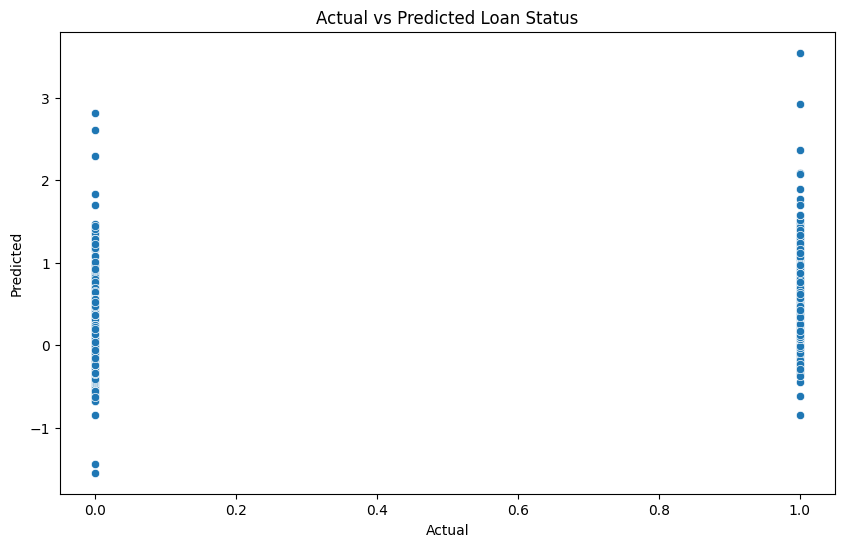

                             Coefficient
loan_amnt                       0.042363
funded_amnt                     0.274230
funded_amnt_inv                -0.352945
term                            0.019052
int_rate                        0.221802
installment                     0.060025
grade                           0.004211
sub_grade                      -0.191014
emp_length                      0.000171
home_ownership                  0.002570
annual_inc                     -0.003132
verification_status             0.004654
issue_d                        -0.043735
purpose                        -0.002078
dti                             0.001259
delinq_2yrs                    -0.000118
earliest_cr_line               -0.000216
inq_last_6mths                  0.004252
mths_since_last_delinq         -0.000249
mths_since_last_record          0.004195
open_acc                        0.000806
pub_rec                        -0.001234
revol_bal                      -0.004211
revol_util      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns or columns used for the target
X = data.drop(columns=["loan_status", "target"])

# Ensure all columns are numeric (as we have already encoded categorical variables)
X = pd.get_dummies(X, drop_first=True)

# Define the target variable
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Loan Status")
plt.show()

# Displaying model coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

For this Linear Regression Model,

    Mean Squared Error (MSE) = 0.057
    R^2 = 0.18


*   Linear regression has a low R² on training data, which means that the linear model is not fitting the data well.It is not good for complex data set.

*   Where the random forest achieves high accuracy and AUC, which indicates that the capturing patterns in the data much better than Linear regression.

* The random forest is clearly the better model than linear regression in most aspects.


  Above analysis indicates that the data likely exhibits non-linear relationships, making tree-based models such as random forests more suitable for achieving accurate predictions.


In [ ]:
# Part 4 starts here:-

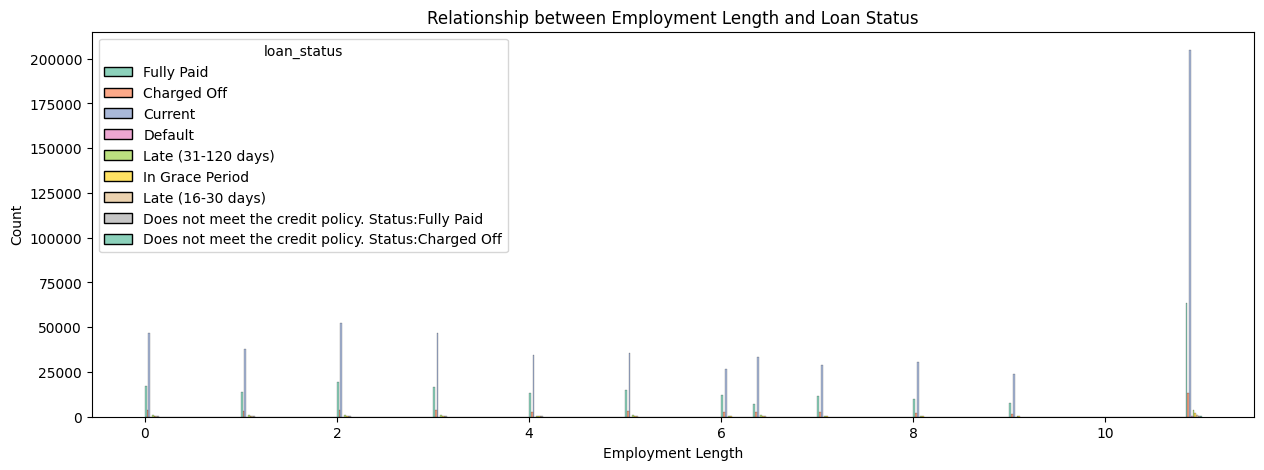

In [ ]:
# Set up the figure
plt.figure(figsize=(15 , 5))

# Create the histogram using Seaborn
sns.histplot(data=data, x="emp_length", hue="loan_status", multiple="dodge", palette='Set2')

# Add title and axis labels
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Show the plot
plt.show()

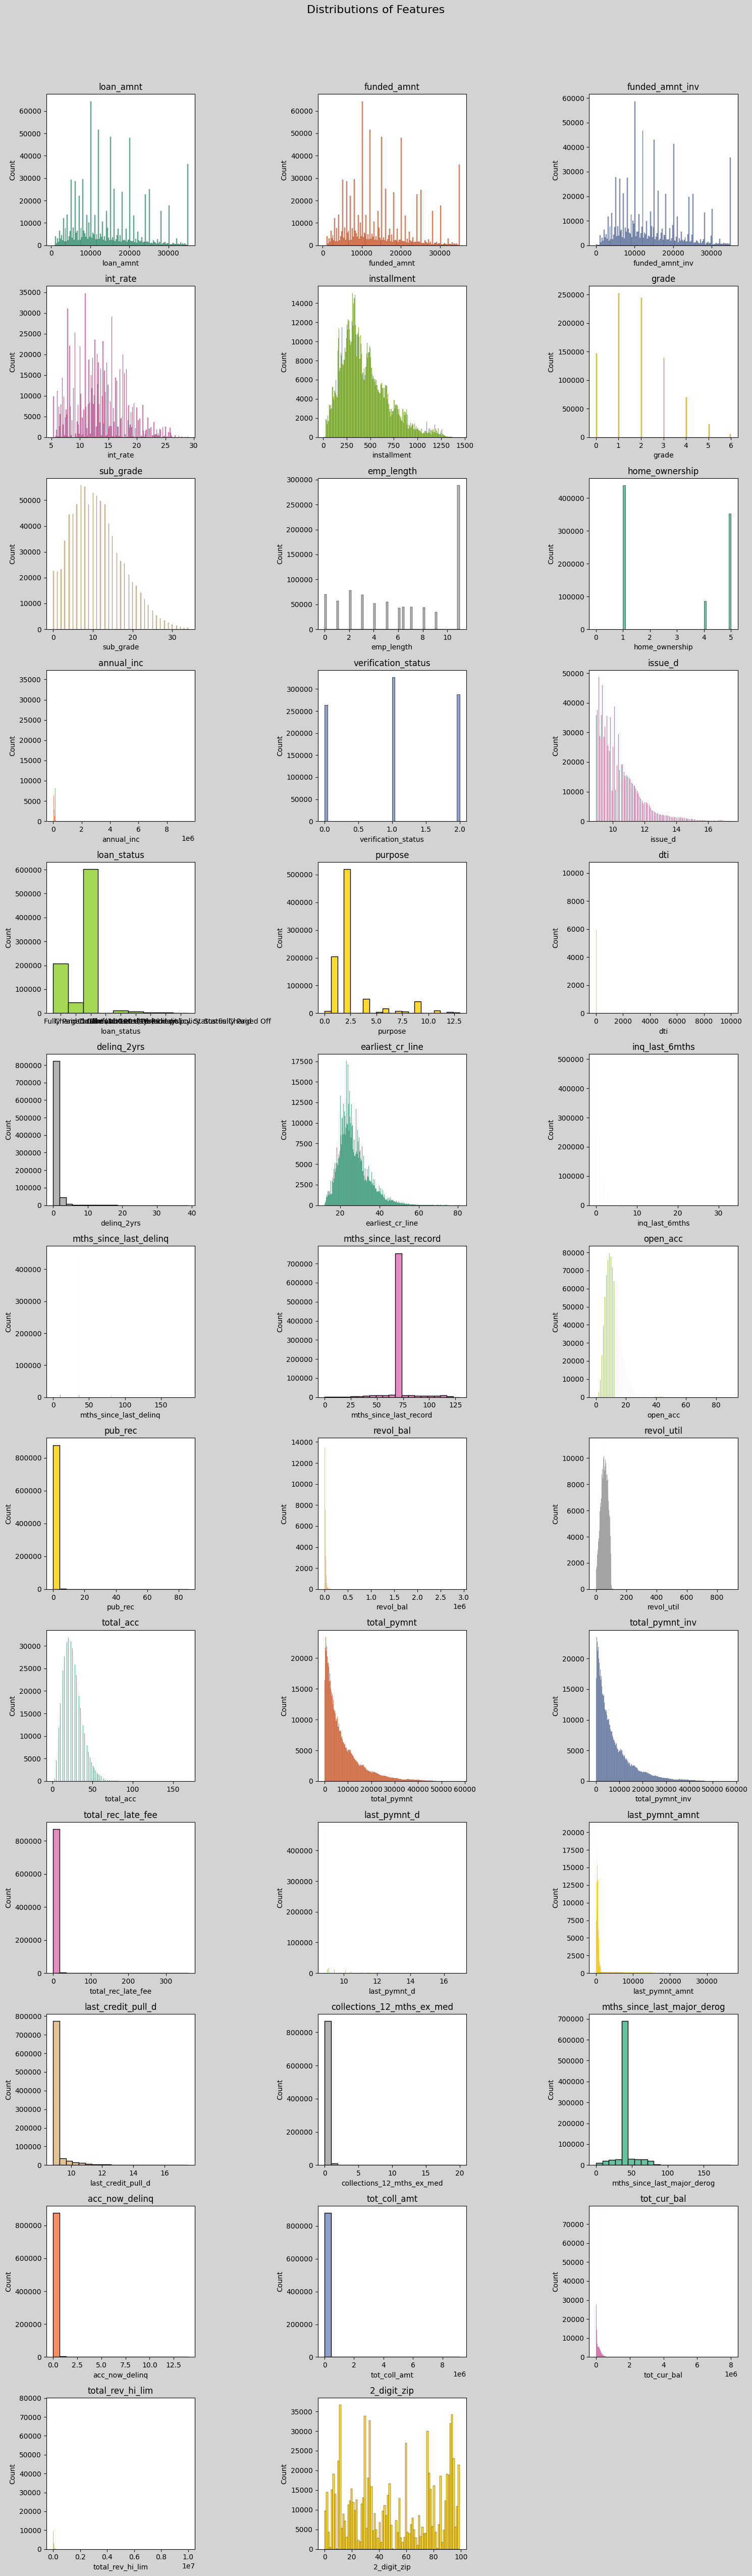

In [ ]:
# Comparing different features of the data with loan amount using graphs.

features = [col for col in data.columns if data[col].nunique() > 2]
rows = (len(features) + 2) // 3
cols = 3
# Set up the figure and axis for subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows
fig.patch.set_facecolor('lightgray')  # Set the background color of the entire figure
palette = sns.color_palette('Set2', len(features))
plotted_df = data.copy()
plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']
for i, col in enumerate(features):
    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1)  # Set alpha slightly transparent for better visualization
    axes[i].set_title(col)
# Remove any empty subplots (in case the number of features doesn't fill the grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Distributions of Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()